In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Min Train Loss: 7.365608
Min Validation Loss: 7.7284
Max HellaSwag eval: 0.2517


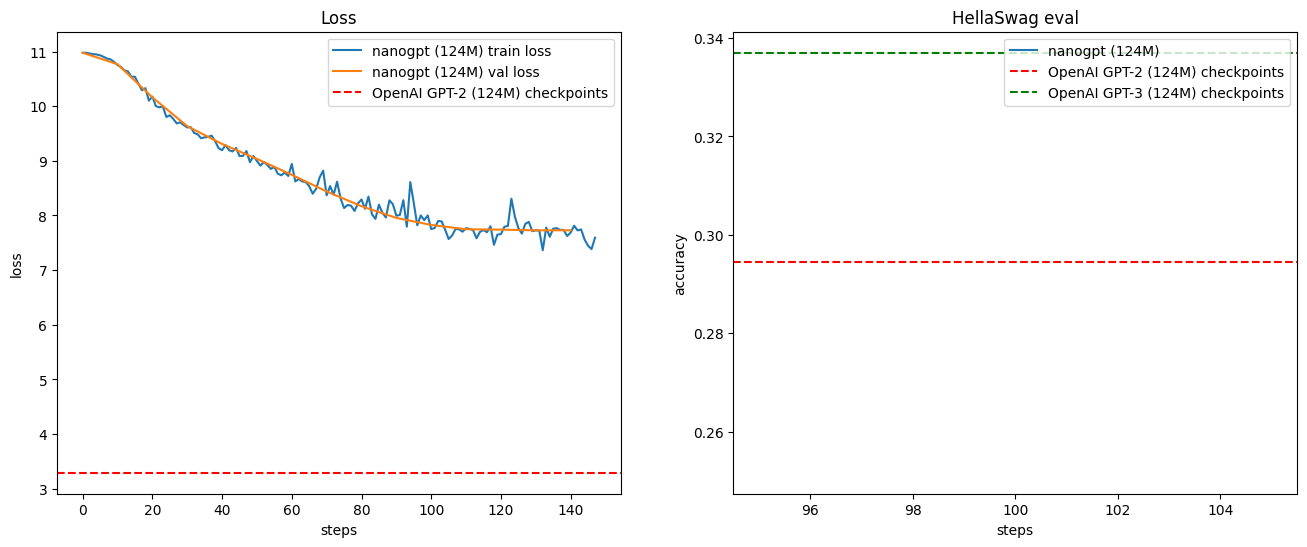

In [28]:
sz = '124M'

loss_baseline = {
    '124M': 3.2924,
}[sz]
hella2_baseline = {
    '124M': 0.294463,
    '350M': 0.375224,
    '774M': 0.431986,
    '1558M': 0.488946,
}[sz]

hella3_baseline = {
    '124M': 0.337,
    '350M': 0.436,
    '774M': 0.510,
    '1558M': 0.547,
}[sz]

with open('log/log.txt', 'r') as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))
plt.subplot(121)
xs, ys = streams_xy['train']
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print(f'Min Train Loss: {min(ys)}')

xs, ys = streams_xy['val']
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')

if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f'OpenAI GPT-2 ({sz}) checkpoints')
plt.xlabel('steps')
plt.ylabel('loss')
#plt.yscale('log')
#plt.ylim(0.0, 4.0)
plt.legend()
plt.title('Loss')
print(f'Min Validation Loss: {min(ys)}')
plt.subplot(122)
xs, ys = streams_xy['hella']
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz})')
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f'OpenAI GPT-2 ({sz}) checkpoints')
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f'OpenAI GPT-3 ({sz}) checkpoints')
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.legend()
plt.title('HellaSwag eval')
print(f'Max HellaSwag eval: {max(ys)}')